In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.axes as ax
import seaborn as sns

##### Loading data

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [5]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [64]:
data.isnull()

AttributeError: 'ellipsis' object has no attribute 'isnull'

In [8]:
data.isnull().sum()

x    0
y    1
dtype: int64

#### Data Processing

In [10]:
data.dropna()
print("shape of data:", data.shape)

shape of data: (700, 2)


In [11]:
data.isnull().sum()

x    0
y    1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


#### Splitting the data

In [21]:
#training input and output
train_input=np.array(data.x[0:500]).reshape(500,1)  #-->reshape(rows, colmn)
train_output=np.array(data.y[0:500]).reshape(500,1)


#validation data input and output
test_input=np.array(data.x[500:700]).reshape(200,1)
test_output=np.array(data.y[500:699]).reshape(199,1)

In [22]:
print(f"training input data shape:{train_input.shape}") 
print(f"training output data shape:{train_output.shape}") 
print(f"test input data shape:{test_input.shape}") 
print(f"test output data shape:{test_output.shape}") 

training input data shape:(500, 1)
training output data shape:(500, 1)
test input data shape:(200, 1)
test output data shape:(199, 1)


In [19]:
np.array(data.x[0:500]).reshape(500,1)

array([[2.40000000e+01],
       [5.00000000e+01],
       [1.50000000e+01],
       [3.80000000e+01],
       [8.70000000e+01],
       [3.60000000e+01],
       [1.20000000e+01],
       [8.10000000e+01],
       [2.50000000e+01],
       [5.00000000e+00],
       [1.60000000e+01],
       [1.60000000e+01],
       [2.40000000e+01],
       [3.90000000e+01],
       [5.40000000e+01],
       [6.00000000e+01],
       [2.60000000e+01],
       [7.30000000e+01],
       [2.90000000e+01],
       [3.10000000e+01],
       [6.80000000e+01],
       [8.70000000e+01],
       [5.80000000e+01],
       [5.40000000e+01],
       [8.40000000e+01],
       [5.80000000e+01],
       [4.90000000e+01],
       [2.00000000e+01],
       [9.00000000e+01],
       [4.80000000e+01],
       [4.00000000e+00],
       [2.50000000e+01],
       [4.20000000e+01],
       [0.00000000e+00],
       [6.00000000e+01],
       [9.30000000e+01],
       [3.90000000e+01],
       [7.00000000e+00],
       [2.10000000e+01],
       [6.80000000e+01],


# <font color="green">Linear Regression</font >

In [24]:
# <font color="green">Linear Regression</font >

#### forward propogation

###### f(x)=m*x+c

In [25]:
def forward_propogation(train_input, parameters):
    m=parameters["m"]
    c=parameters["c"]

    predictions=np.multiply(m,train_input) + c

    return predictions

#### cost functions

summation(1/2n * (y-f(x))^2)

In [26]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) **2) * 0.5
    return cost

#### Gradient Descent for backpropogation

##### df=summ(f(x)-y)/n

##### dm=df*x

##### dc=df*1

In [37]:
def backward_propogation(train_input, train_output, predictions):
    derivatives = dict()
    df=predictions-train_output
    dm = np.mean(np.multiply(df, train_input))
    dc=np.mean(df)
    derivatives["dm"]=dm
    derivatives["dc"]=dc

    return derivatives

#### Update Parameters

##### m=m-(learning_rate * dm)
##### c=c-(learning_rate * dc)

In [44]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    return parameters

### Model Training:

In [55]:
def train(train_input, train_output, learning_rate, iters):
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()

    #loss
    loss=list()
    
    #iteration
    for i in range(iters):
        #forward propogation
        predictions = forward_propogation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)

        loss.append(cost)
        print(f"Iteration = {i+1}, Loss={cost}")


        #plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label="Original")
        ax.plot(train_input, forward_propogation(train_input, parameters), "*", label="Training")
        legend = ax.legend()
        
        plt.plot(train_input, train_output, "+", label="Original")
        plt.plot(train_input, predictions, "*", label="Training")
        plt.show()

        #back_propogation
        derivatives=backward_propogation(train_input, train_output, predictions)
        
        #update the parameters
        parameters=update_parameters(parameters, derivatives, learning_rate)

    return parameters

### Training:

Iteration = 1, Loss=nan


<Figure size 640x480 with 0 Axes>

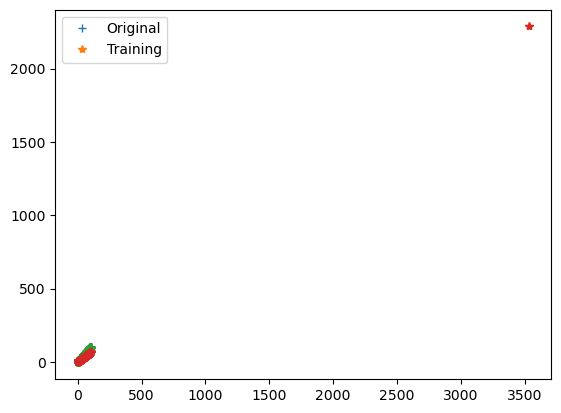

Iteration = 2, Loss=nan


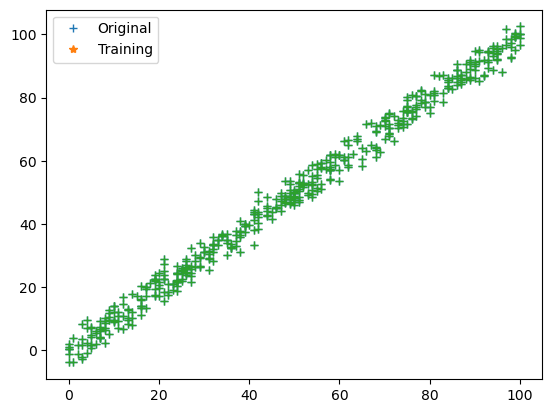

Iteration = 3, Loss=nan


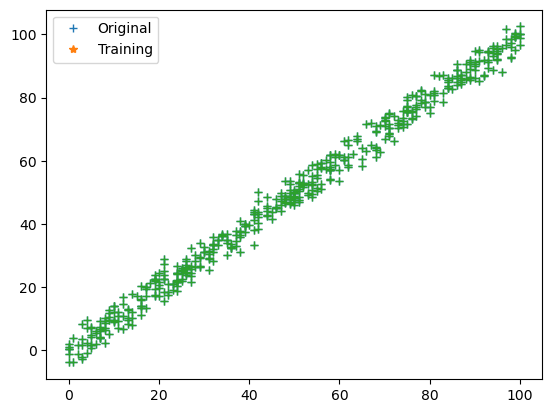

Iteration = 4, Loss=nan


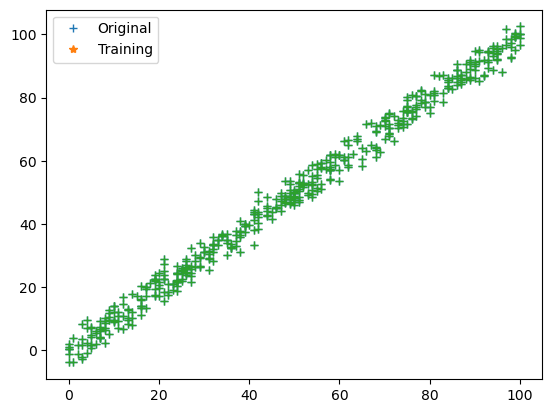

Iteration = 5, Loss=nan


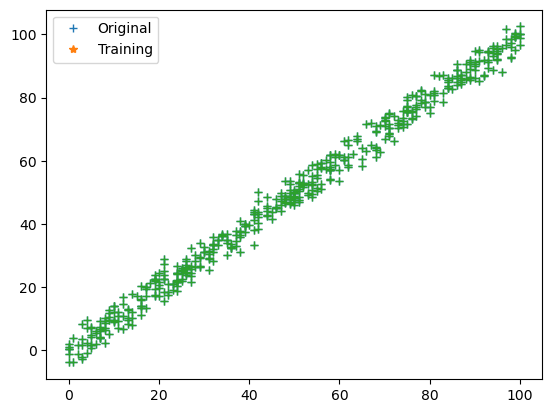

Iteration = 6, Loss=nan


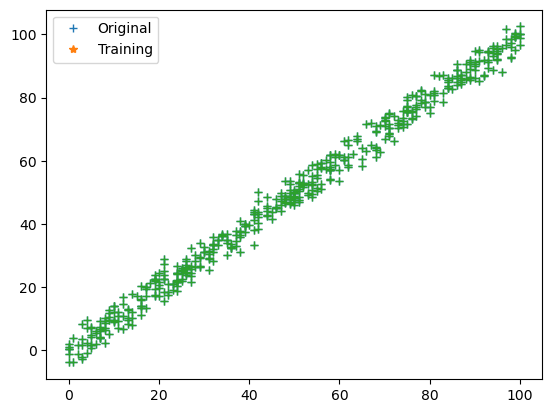

Iteration = 7, Loss=nan


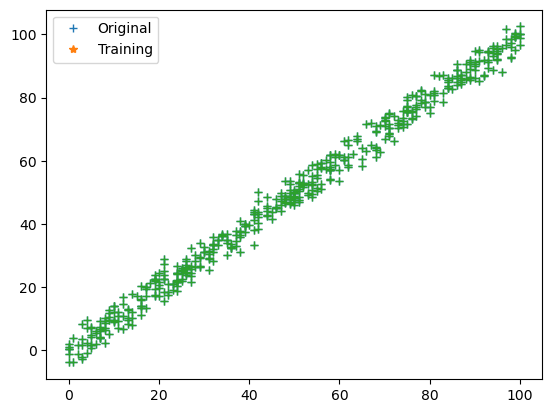

Iteration = 8, Loss=nan


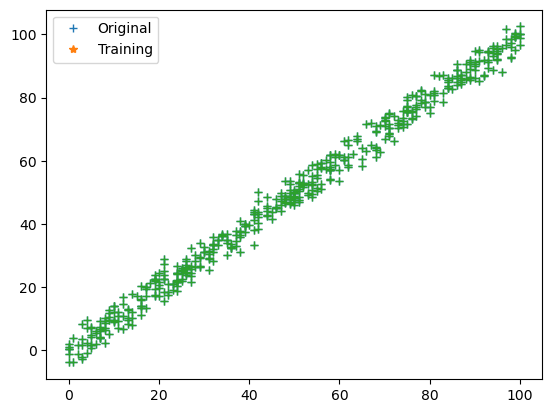

Iteration = 9, Loss=nan


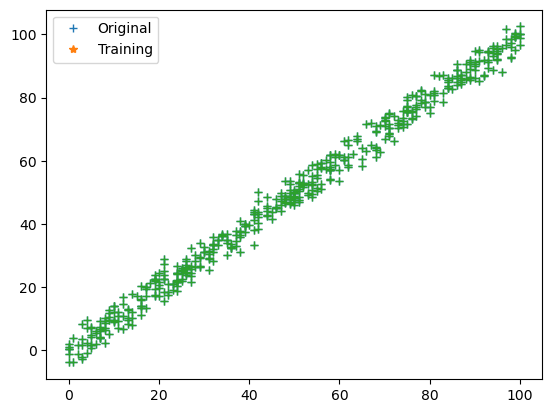

Iteration = 10, Loss=nan


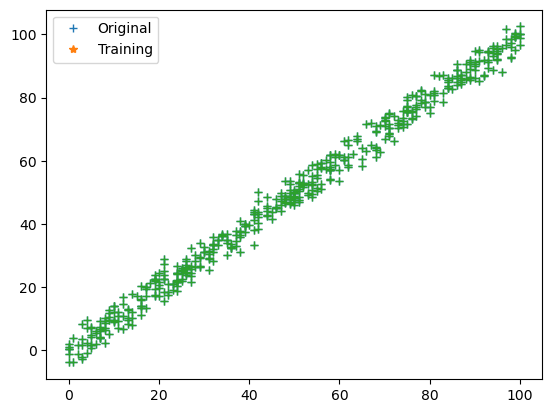

Iteration = 11, Loss=nan


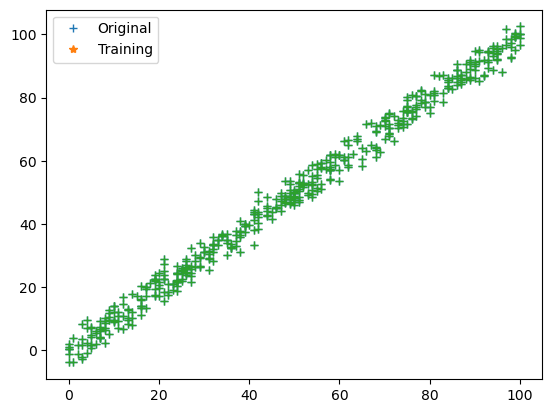

Iteration = 12, Loss=nan


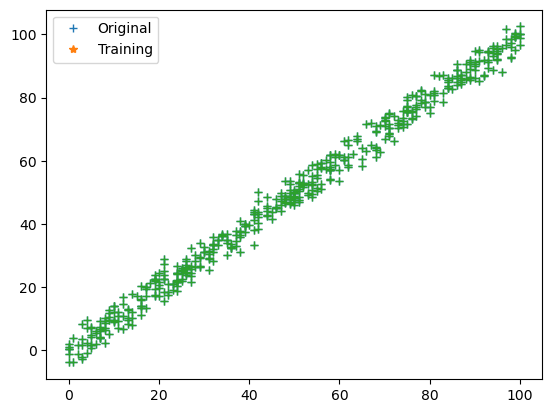

Iteration = 13, Loss=nan


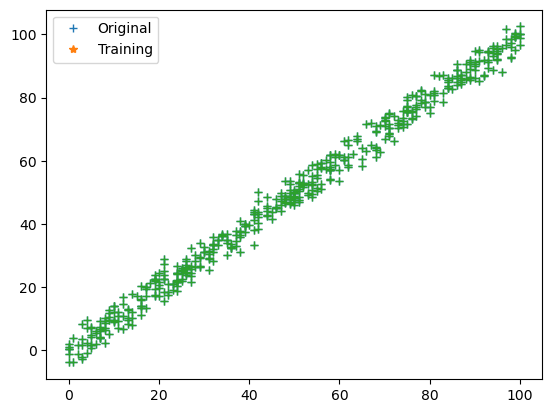

Iteration = 14, Loss=nan


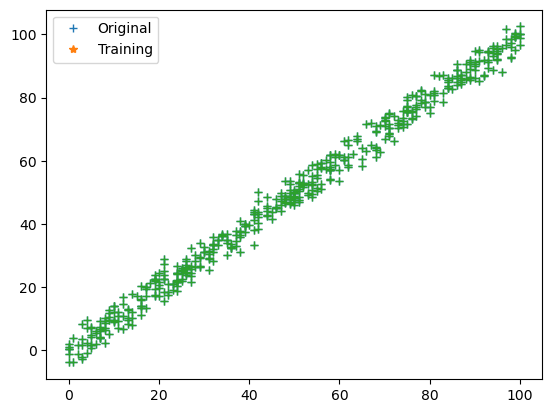

Iteration = 15, Loss=nan


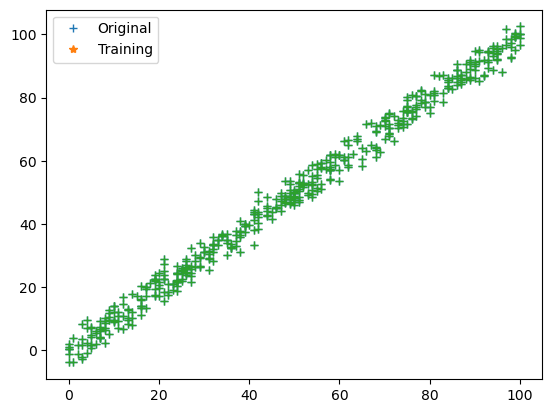

Iteration = 16, Loss=nan


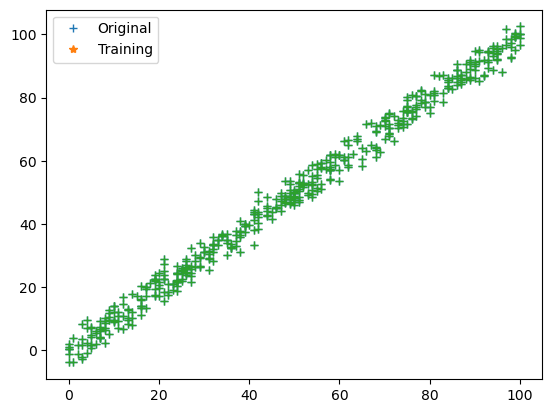

Iteration = 17, Loss=nan


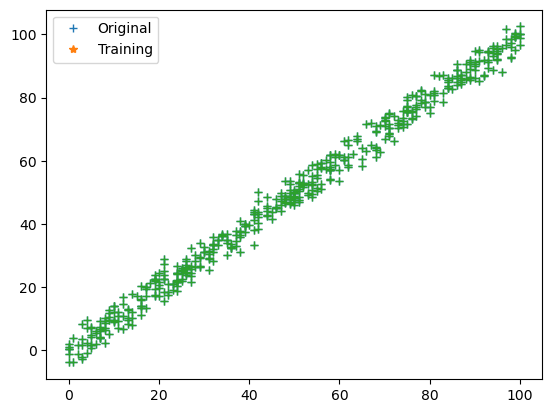

Iteration = 18, Loss=nan


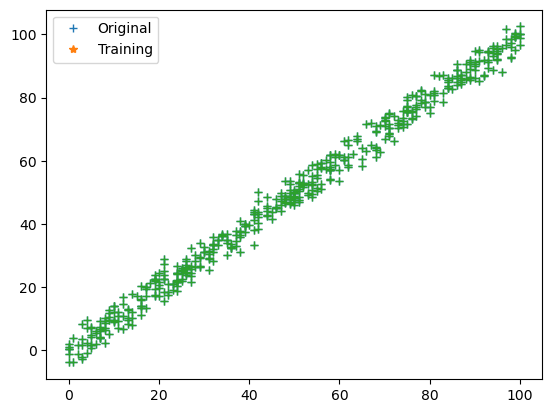

Iteration = 19, Loss=nan


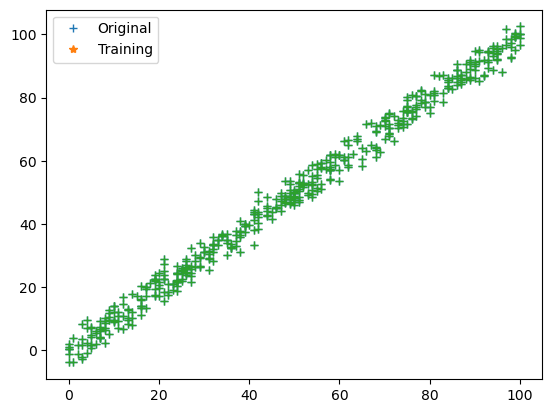

Iteration = 20, Loss=nan


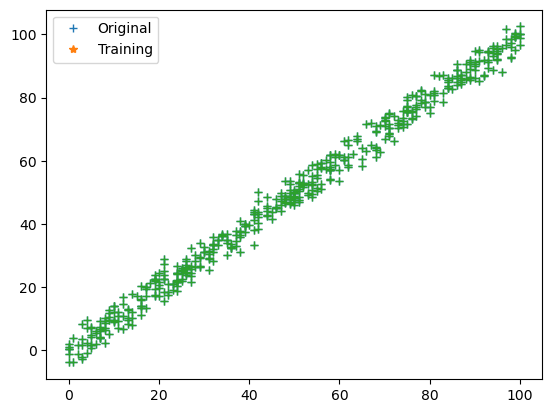

In [56]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss=nan


<Figure size 640x480 with 0 Axes>

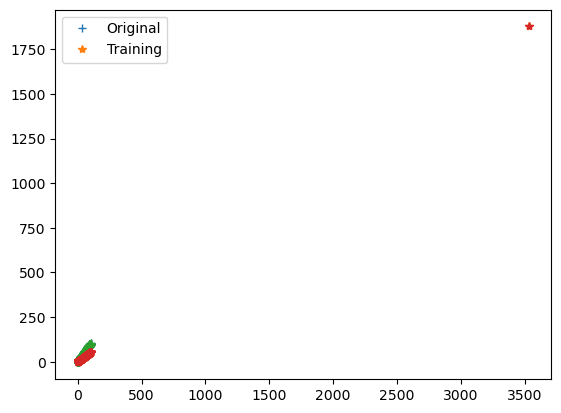

Iteration = 2, Loss=nan


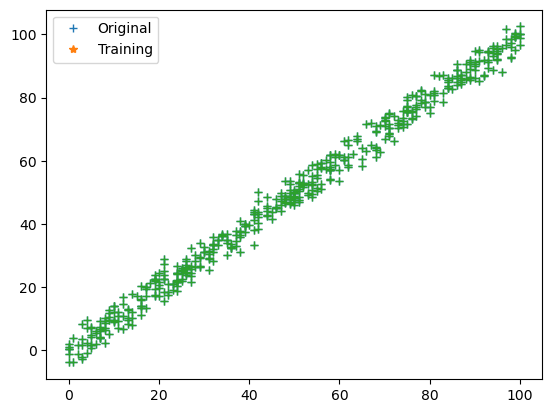

Iteration = 3, Loss=nan


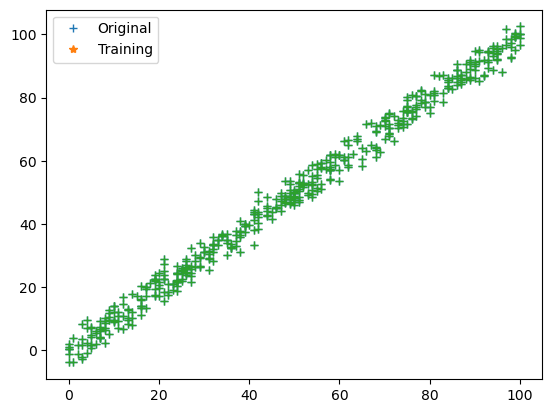

Iteration = 4, Loss=nan


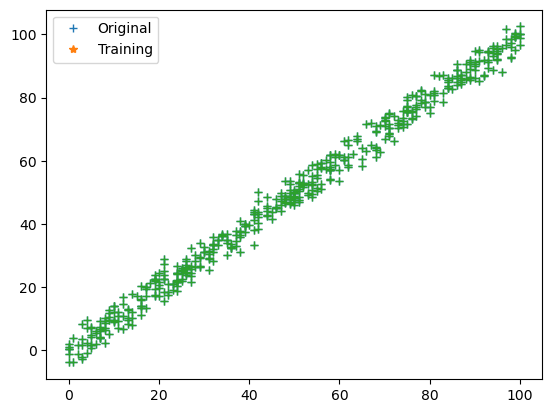

Iteration = 5, Loss=nan


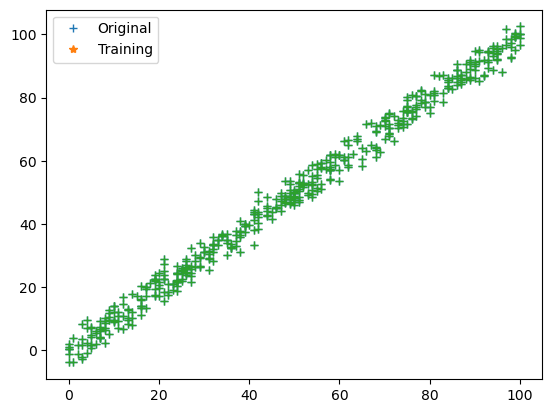

Iteration = 6, Loss=nan


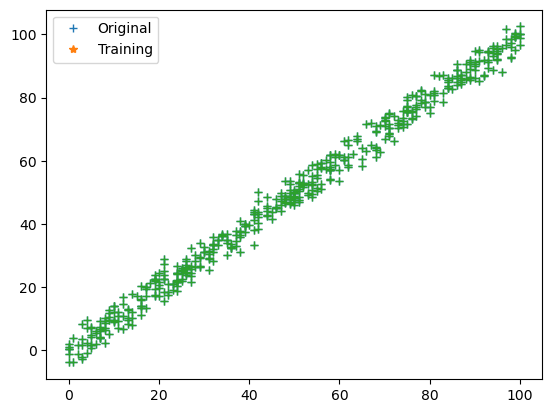

Iteration = 7, Loss=nan


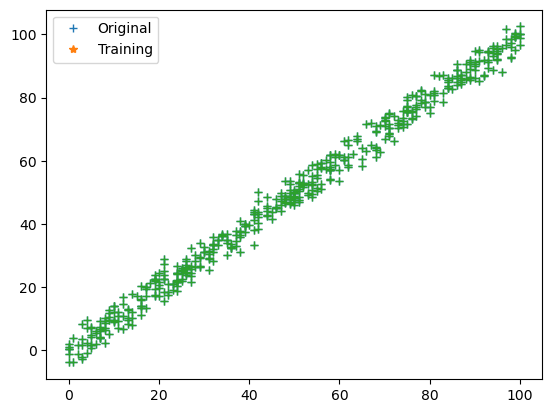

Iteration = 8, Loss=nan


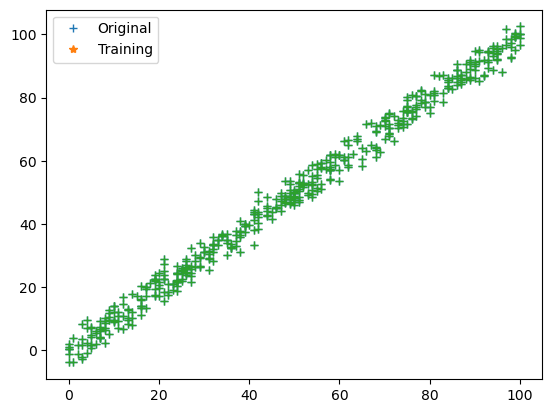

Iteration = 9, Loss=nan


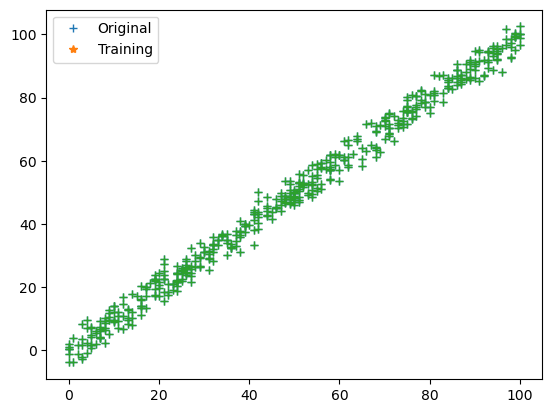

Iteration = 10, Loss=nan


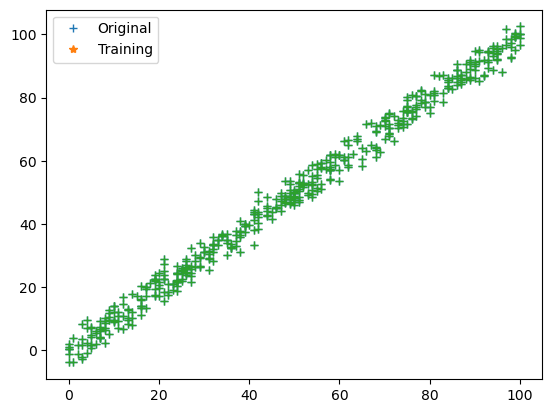

Iteration = 11, Loss=nan


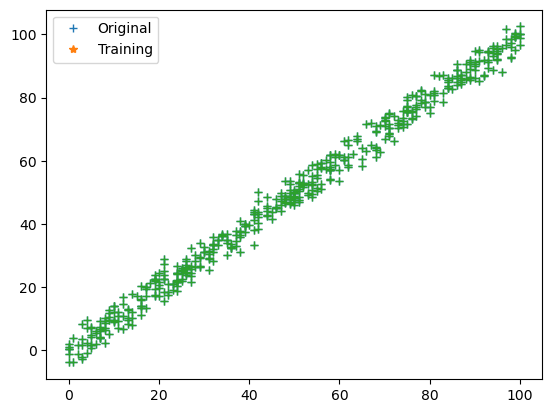

Iteration = 12, Loss=nan


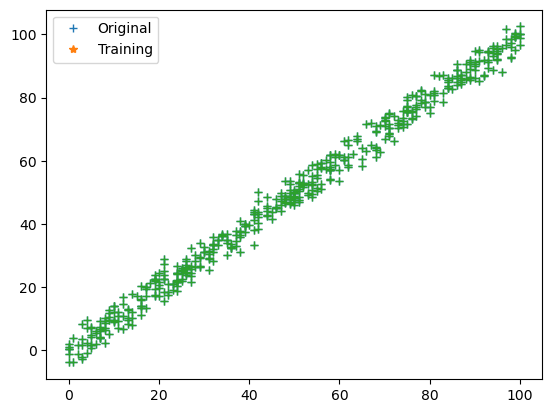

Iteration = 13, Loss=nan


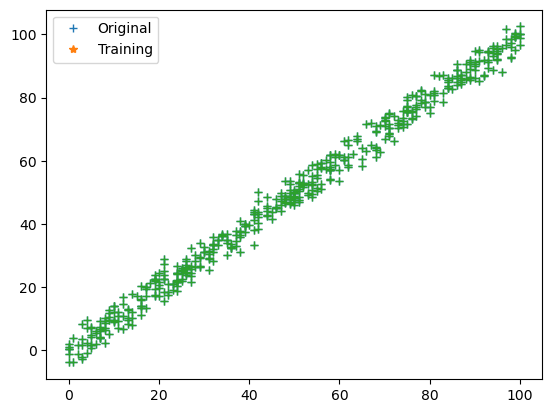

Iteration = 14, Loss=nan


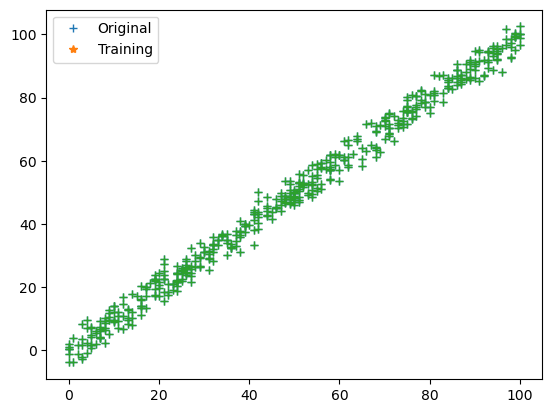

Iteration = 15, Loss=nan


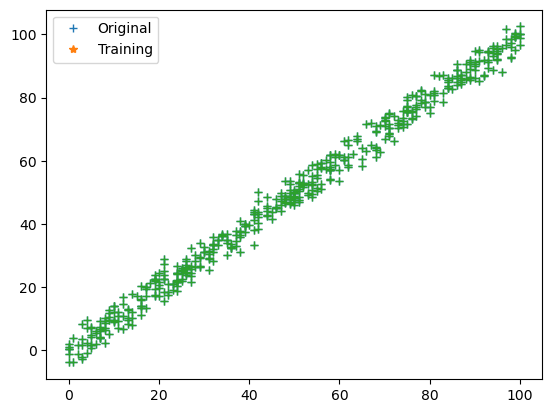

Iteration = 16, Loss=nan


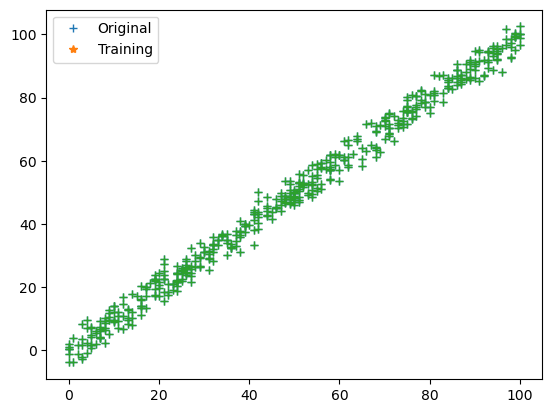

Iteration = 17, Loss=nan


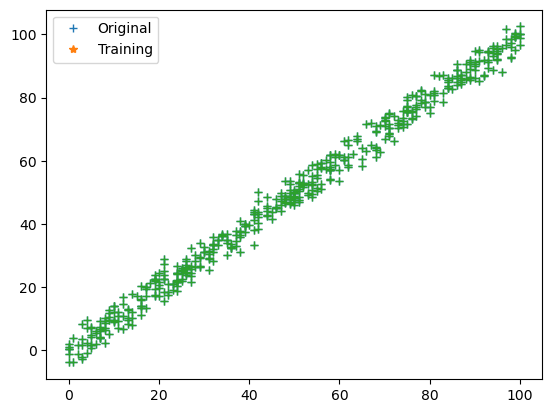

Iteration = 18, Loss=nan


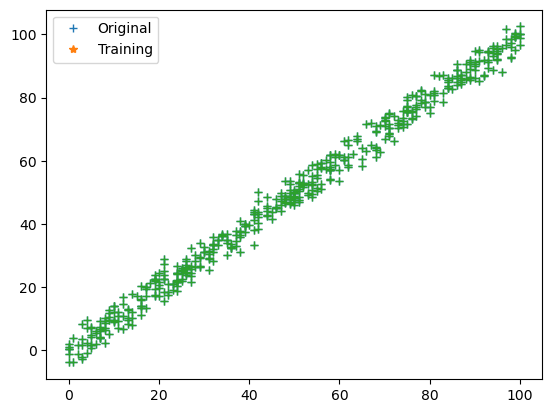

Iteration = 19, Loss=nan


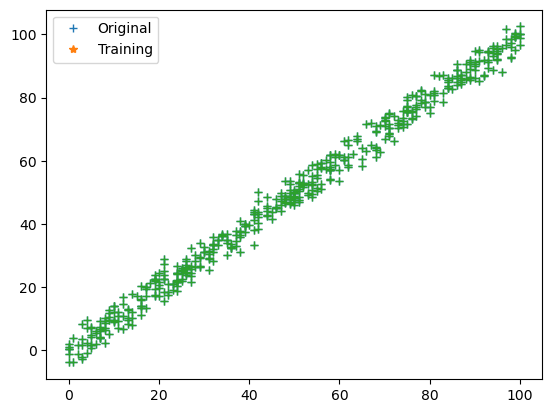

Iteration = 20, Loss=nan


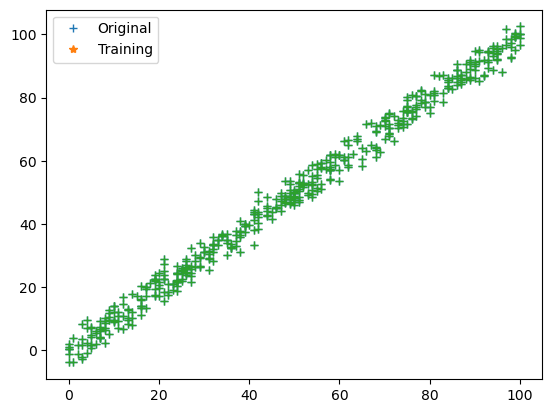

In [57]:
parameters, loss = train(train_input, train_output, 0.1, 20)